In [2]:
from __future__ import print_function
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
from math import sqrt,cos,acos,pi,exp,sin,atan2,log
from numpy import arange,mean,asarray,isnan,isinf
import pickle
from scipy import stats

import csv
import sys
import pandas as pd
import os

fset = 0 # 0 = open data, 1-7 = fake datasets, 8 = High E far sideband, 9 = Low BDT far sideband
cutMode = 0 # 0 = Final Selection, 1 = Kin Cut Sample, 2 = High E, 3 = Low BDT
if fset==8: cutMode = 2
if fset==9: cutMode = 3
    
savedir = {0:'FinalSelection',1:'KinCut',2:'HighE',3:'LowBDT'}[cutMode]

lowEpatch = False#True if fset in [0,5,8,9] else False
vtxCut    = 5#np.inf

C1_POT = 1.558e+20 + 1.129e+17 + 1.869e+19
D2_POT = 1.63e+20 + 2.964e+19 + 1.239e+19
E1_POT = 5.923e+19
F1_POT = 4.3e+19
G1_POT = 1.701e+20 + 2.97e+19 + 1.524e+17


if fset==0: 
    DAT_POT1 = 4.403e19
    DAT_POT3 = 8.786e+18
elif fset==1: 
    DAT_POT1  = 1.9710529814e+20
    DAT_POT3  = 2.86144913724e+20
elif fset==2: 
    DAT_POT1 = 3.617e+20
    DAT_POT3 = 3.841e+20
elif fset==3: 
    DAT_POT1 = 3.840e+20
    DAT_POT3 = 3.968e+20
elif fset==4: 
    DAT_POT1 = 3.86746111569e+20
    DAT_POT3 = 3.92745929386e+20
elif fset==5: 
    DAT_POT1 = 7.0219630122e+20
    DAT_POT3 = 0
elif(fset==8):
    DAT_POT1 = C1_POT
    DAT_POT2 = D2_POT+E1_POT
    DAT_POT3 = F1_POT+G1_POT
elif(fset==9):
    DAT_POT1 = C1_POT
    DAT_POT2 = D2_POT+E1_POT
    DAT_POT3 = G1_POT

if cutMode==0 and fset==0:
    DAT_POT1 = C1_POT
    DAT_POT2 = E1_POT+D2_POT
    DAT_POT3 = F1_POT+G1_POT
    
DATA_POT_TOT = DAT_POT1 + DAT_POT2 + DAT_POT3


print(DAT_POT1,DAT_POT2,DAT_POT3)
print(DATA_POT_TOT)


1.746029e+20 2.6426e+20 2.429524e+20
6.818153e+20


In [3]:
tag='3March2021_vA_fullLowE_withPi0Sample_newShowerCalib'

filetaglist = {1:['ext','overlay','overlay_lowE','intrinsics','intrinsics_lowE','ncpi0','ccpi0'],
               2:['overlay','overlay_lowE','intrinsics','intrinsics_lowE'],
               3:['ext','overlay','overlay_lowE','intrinsics','intrinsics_lowE','ncpi0','ccpi0']}

df = {1:{},2:{},3:{}}

psavedir = 'Parquets/'+tag+'/'

for r in [1,2,3]:
    print('\n\n','#'*20,'RUN',r,'#'*20,'\n')

    for filetag in filetaglist[r]:
        if not lowEpatch and 'lowE' in filetag: continue
        print('Sample:',filetag)
        pstring = 'SelectionMode%i_%s_run%i.parquet.gzip'%(cutMode,filetag,r)
        df[r][filetag] = pd.read_parquet(psavedir+pstring)



 #################### RUN 1 #################### 

Sample: ext
Sample: overlay
Sample: intrinsics
Sample: ncpi0
Sample: ccpi0


 #################### RUN 2 #################### 

Sample: overlay
Sample: intrinsics


 #################### RUN 3 #################### 

Sample: ext
Sample: overlay
Sample: intrinsics
Sample: ncpi0
Sample: ccpi0


In [4]:
    

varb_names = ['Enu_1e1p','Eta','PT_1e1p','AlphaT_1e1p',
              'SphB_1e1p','PzEnu_1e1p','ChargeNearTrunk',
              'Q0_1e1p','Q3_1e1p','Thetas','Phis','PTRat_1e1p',
              'Proton_ThetaReco','Proton_PhiReco',
              'MinShrFrac','MaxShrFrac',
              'BjXB_1e1p','BjYB_1e1p','Proton_Edep',
              'Electron_Edep',
              'Lepton_ThetaReco','Lepton_PhiReco',
              'OpenAng','Xreco','Yreco','Zreco',
              'sigprob','MPIDY_muon',
              'MPIDY_proton','MPIDY_eminus','shower_fraction',
              'Shower_Consistency',
              'EnuQE_lepton','EnuQE_proton','EnuTrue']

var_labels = [r'$E_\nu^{Range}$ [MeV]',r'$\eta$',r'Event $p_T$ [MeV]',r'$\alpha_T$',
              'QE Consistency',r'$p_z - E_\nu$ [MeV]','Charge Near Trunk',
              r'$Q_0$ [MeV]',r'$Q_3$ [MeV]',r'$\theta_e + \theta_p$',r'$|\phi_e - \phi_p|$',r'Event $p_T/p$',
              r'$\theta_p$',r'$\phi_p$',
              'Minimum Shower Fraction','Maximum Shower Fraction',
              'Bjorken X (Nucleon Rest Frame)','Bjorken Y (Nucleon Rest Frame)',r'$E_p$ [MeV]',
              r'$E_e$ [MeV]',
              r'$\theta_e$',r'$\phi_e$',
              'Opening Angle',r'$X_{reco}$',r'$Y_{reco}$','$Z_{reco}$',
              '1e1p BDT Score','Muon MPID Score (Y plane)',
              'Proton MPID Score (Y plane)','Electron MPID Score (Y plane)','Shower Fraction',
              'Shower Energy Consistency',
              r'$E_\nu^{Q-e}$',r'$E_\nu^{QE-p}$',r'$E_\nu^{True}$ [MeV]']

ranges = [ (0,1200),(0,0.6),(0,800),(0,np.pi),(0,5000),(-800,300),
           (0,800),(100,700),(0,1400),(0,2*np.pi),(0,2*np.pi),
           (0,1),(0,np.pi),(-np.pi,np.pi),(-1,1),(-1,1),(0,3),
           (0,1),(60,500),(35,1200),(0,np.pi),
           (-np.pi,np.pi),(0,np.pi),(0,256),(-117,117),(0,1036),
           (0.0,1),(0,1),(0,1),(0,1),(0,3),(0,5),
           (0,1200),(0,1200),(0,1200)]

varlabel_dict = {name:label for name,label in zip(varb_names,var_labels)}
range_dict = {name:rnge for name,rnge in zip(varb_names,ranges)}

    

In [5]:
# HELPER FUNCTIONS

def getSysErrors(nbins,varName,POT1,POT3):
    try:
        det_sys_m_1 = np.loadtxt('DetectorSystematics/covMatrixv0/detsys_'+varName+'_run1_cov.csv',delimiter=',')
        det_sys_m_3 = np.loadtxt('DetectorSystematics/covMatrixv0/detsys_'+varName+'_run3_cov.csv',delimiter=',')
        det_sys_m = (det_sys_m_1*POT1 + det_sys_m_3*POT3)/(POT1+POT3)
    except:
        det_sys_m = np.zeros((nbins,nbins))
    try:
        rwt_sys_m = np.loadtxt('RwghtCovMatrices/FinalSelection/frac_covar_rewgt_final__'+varName+'.txt')
    except:
        rwt_sys_m = np.zeros((nbins,nbins))
    rwt_sys_m = np.where(np.isnan(rwt_sys_m),0,rwt_sys_m)
    det_sys_m = np.where(np.isnan(det_sys_m),0,det_sys_m)
    return rwt_sys_m,det_sys_m

def MakeBDTcut(idf,sigcut,mode,nBDTs,r2overlay=False):
    
    # Conglemerate BDT scores and weights based on strategy 
    
    bdtweight = np.zeros(idf.shape[0])
    sigprobmax = np.zeros(idf.shape[0]) 
    sigprobavg = np.zeros(idf.shape[0])
    sigprobmedian = np.zeros(idf.shape[0])
    sigproblist = np.zeros((idf.shape[0],nBDTs))
    notintrain = np.zeros((idf.shape[0],nBDTs),dtype=bool)
    numnottrain = np.zeros(idf.shape[0])
    for b in range(nBDTs):
        sp = idf['sigprob%i'%b]
        tvw = idf['tvweight%i'%b]
        sigprobmax = np.where(np.logical_and(tvw>0,sp>sigprobmax),sp,sigprobmax) # cut on the maximum non-train score in ensemble
        if mode == 'fracweight':
            #bdtweight += np.where(sp>sigcut,tvw/float(nBDTs),0)
            bdtweight += np.where((tvw>0.1) & (sp>sigcut),1.0,0.0)
        sigprobavg += np.where(tvw>0.1,sp,0)
        numnottrain += np.where(tvw>0.1,1,0)
        sigproblist[:,b] = sp
        notintrain[:,b] = tvw > 0.1
    sigprobavg /= np.where(numnottrain>0,numnottrain,1)
    for i,(tlist,siglist) in enumerate(zip(notintrain,sigproblist)):
        splist = siglist[tlist]
        if splist.size!=0: sigprobmedian[i] = np.median(splist)
        else: sigprobmedian[i] = 0
        
    idf['sigprobavg'] = sigprobavg
    idf['sigprobmedian'] = sigprobmedian
    idf['sigprobmax'] = sigprobmax
    
    if mode == 'avgscore':
        idf['sigprob'] = idf['sigprobavg']
        bdtweight = np.where(sigprobavg>sigcut,1,0)
    elif mode == 'medianscore':
        idf['sigprob'] = idf['sigprobmedian']
        bdtweight = np.where(sigprobmedian>sigcut,1,0)
    elif mode == 'fracweight':
        idf['sigprob'] = idf['sigprobmax']
        bdtweight /= np.where(numnottrain>0,numnottrain,1)
    
    idf['bdtweight'] = bdtweight
    
    # Drop duplicates
    
    idf.sort_values(by=['run','subrun','event','sigprob'],ascending=False,inplace=True)
    if r2overlay:
        idf.drop_duplicates(subset=['run','subrun','event','EnuTrue'],inplace=True)
    else:
        idf.drop_duplicates(subset=['run','subrun','event'],inplace=True)
    
    

In [6]:
staterror = {'lee':{},'bkg':{}}
prediction = {'lee':{},'bkg':{}}
weightsdict = {'lee':{},'bkg':{}}
numbkgevents = {'lee':{},'bkg':{}}
xbinsdict = {'lee':{},'bkg':{}}
xbinedgesdict = {'lee':{},'bkg':{}}
plotmultdict = {}

/home/nwkamp/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 432x288 with 0 Axes>

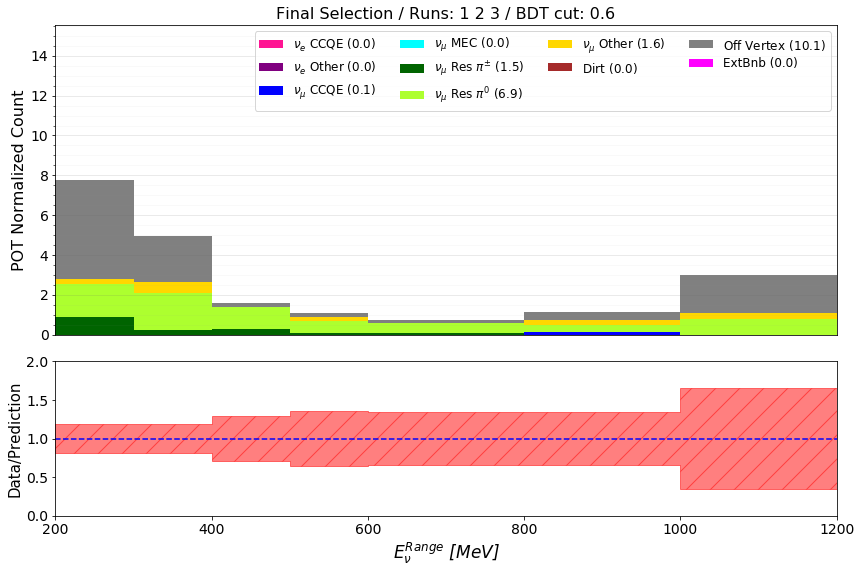

<Figure size 432x288 with 0 Axes>

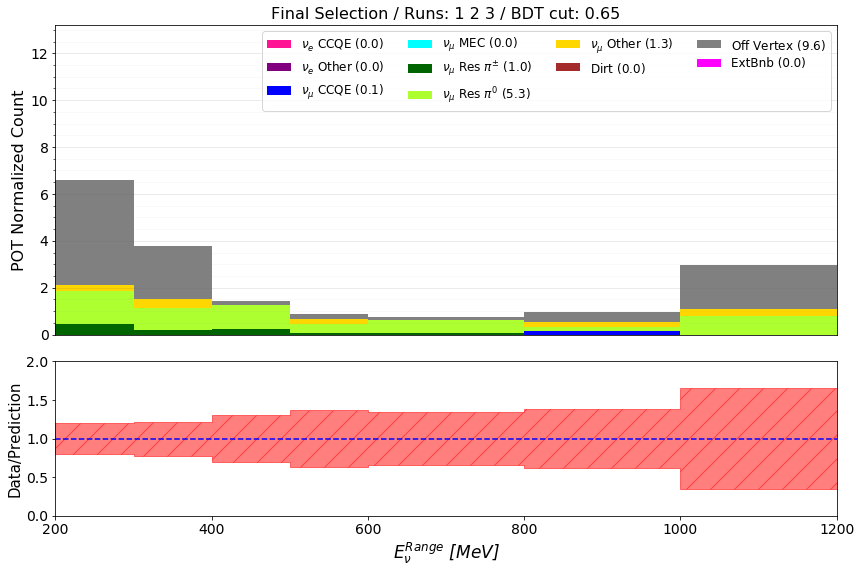

<Figure size 432x288 with 0 Axes>

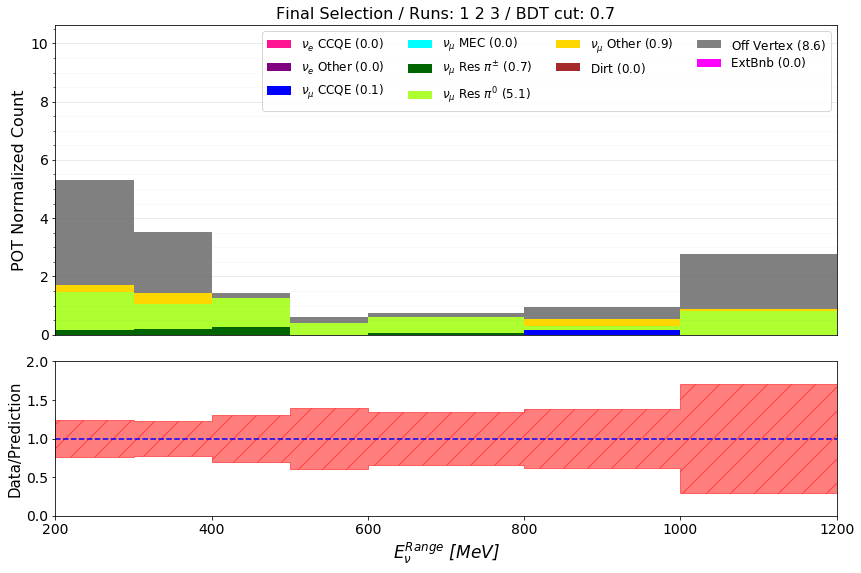

<Figure size 432x288 with 0 Axes>

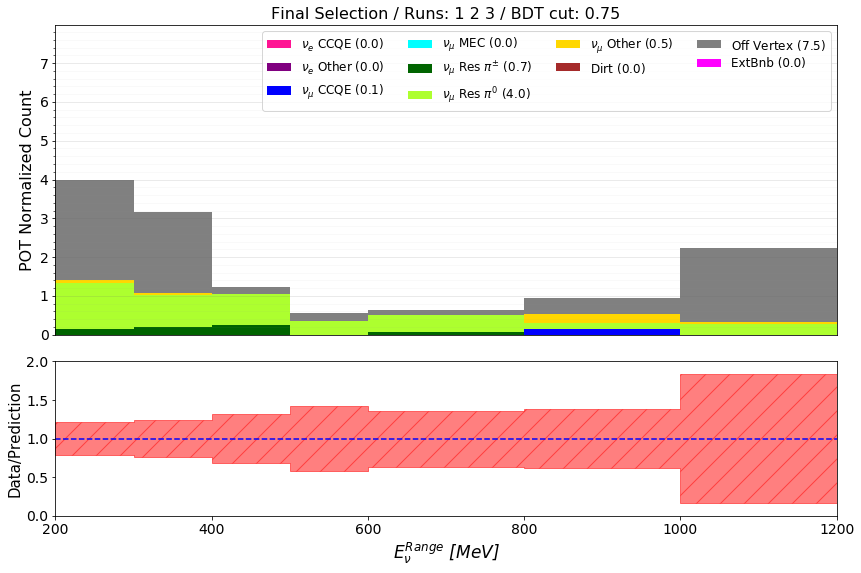

<Figure size 432x288 with 0 Axes>

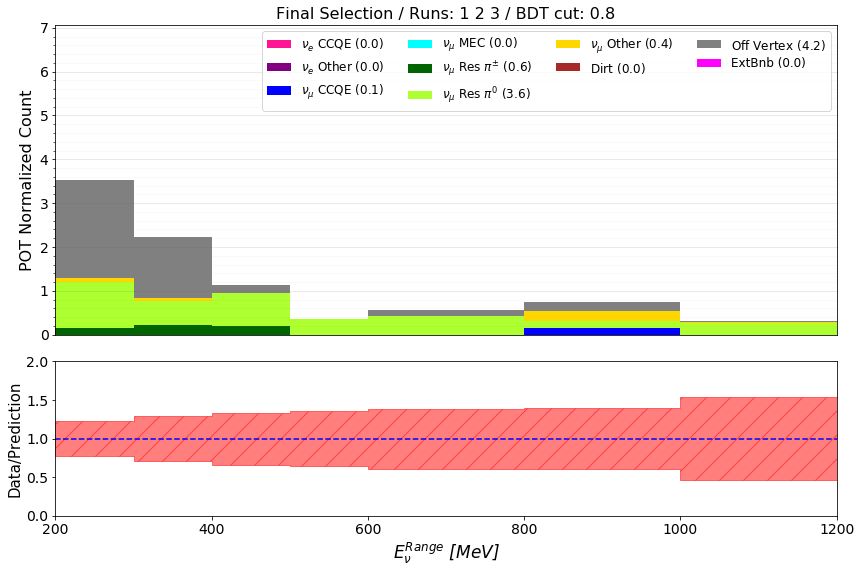

<Figure size 432x288 with 0 Axes>

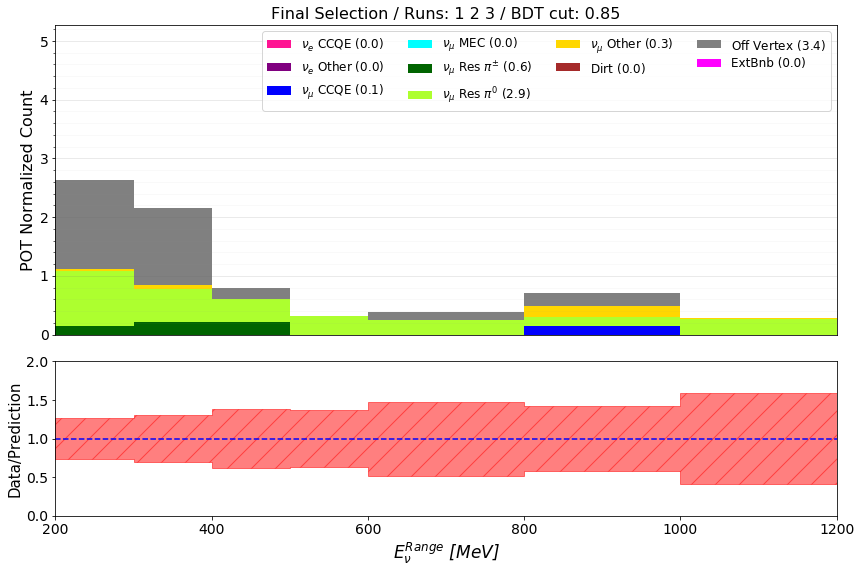

<Figure size 432x288 with 0 Axes>

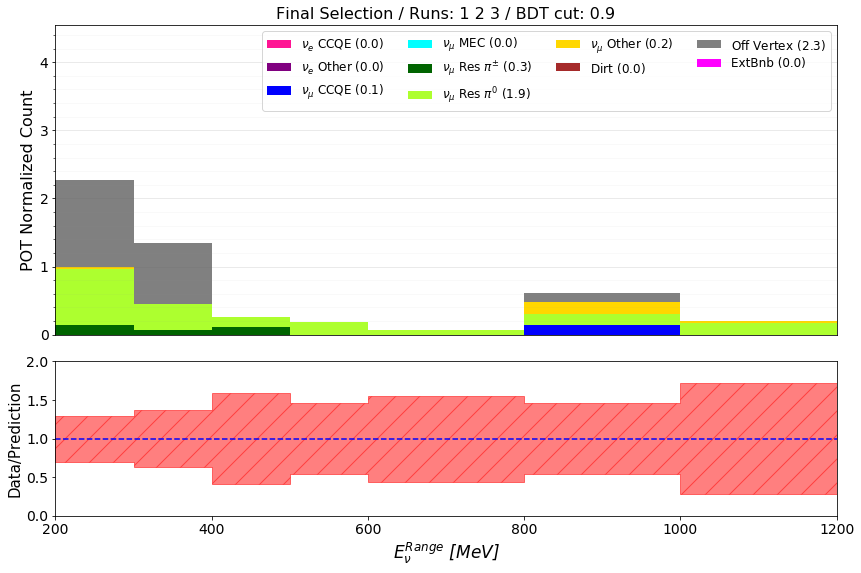

<Figure size 432x288 with 0 Axes>

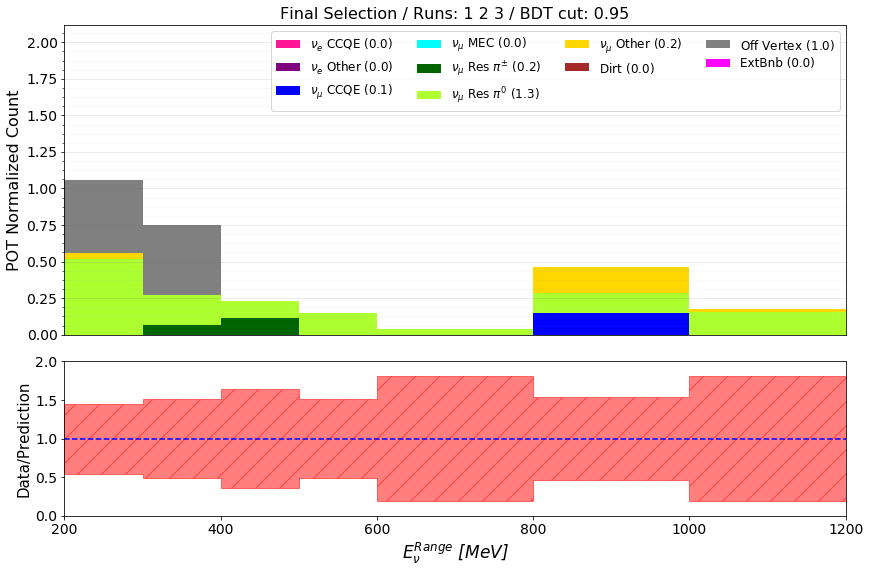

<Figure size 432x288 with 0 Axes>

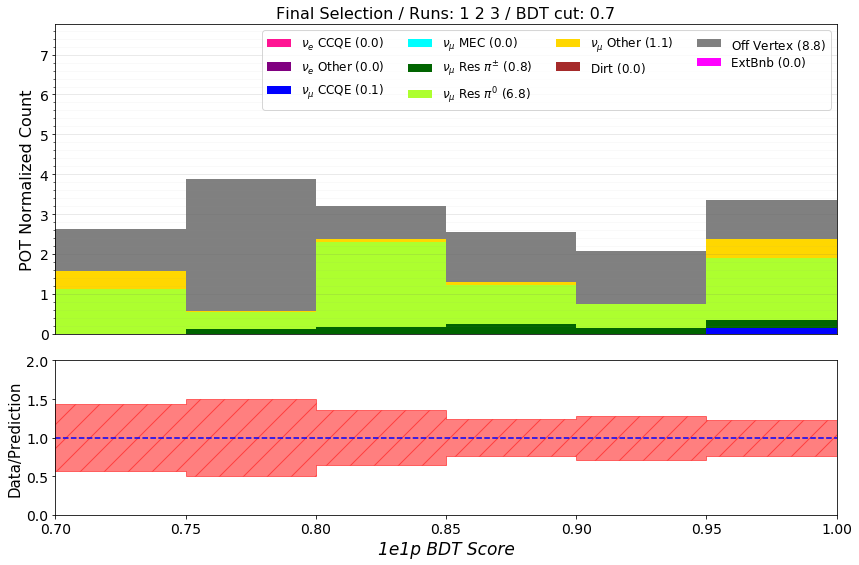

<Figure size 432x288 with 0 Axes>

In [7]:
fudge_nue = 0.0

verbose = False
sys     = False
bdtmode = 'avgscore'
protonMPIDcut = False
nBDTs = 20
bdtpower = 0
bdtcutRange = [0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
runs_to_plot = [#[1],
                #[2],
                #[3],
                [1,2,3]]

POTdict = {1:{ft:DAT_POT1 for ft in filetaglist[1]},
           2:{ft:DAT_POT2 for ft in filetaglist[2]},
           3:{ft:DAT_POT3 for ft in filetaglist[3]}}
POTdict[3]['ext'] = DAT_POT2 + DAT_POT3


for varName in varb_names:


    
    if varName not in ['Enu_1e1p','sigprob']: continue
    
        
    xlab = varlabel_dict[varName]
    
    low   = (range_dict[varName])[0]
    high  = (range_dict[varName])[1]
    
    if varName in ['Enu_1e1p']:
        xbin_edges = np.array([200,300,400,500,600,800,1000,1200],dtype=float)
        bins = len(xbin_edges)-1
    else:
        bins = 6
        xbin_edges = np.linspace(low,high,bins+1)
    xbins = 0.5*(xbin_edges[1:] + xbin_edges[:-1])
    binwidts = xbin_edges[1:]-xbin_edges[:-1]
    binwid = xbin_edges[1]-xbin_edges[0]
    plotmult = binwid/binwidts
    plotmult = np.ones_like(plotmult)
    low   = xbin_edges[0]
    high  = xbin_edges[-1]
            
    
    
    
    
    for runs_included in runs_to_plot: # [run 1, run 2 run 3]
        
        for cut in bdtcutRange:
            
            if varName=='sigprob':
                if cut!= 0.7: continue
                xbin_edges = np.linspace(cut,high,bins+1)
                xbins = 0.5*(xbin_edges[1:] + xbin_edges[:-1])
                binwidts = xbin_edges[1:]-xbin_edges[:-1]
                binwid = xbin_edges[1]-xbin_edges[0]
                plotmult = binwid/binwidts
                low   = xbin_edges[0]
                high  = xbin_edges[-1]
            

            if fset in range(1,6): plotTitle = 'Fake Dataset '+str(fset)+' / Runs:'
            elif cutMode==0: plotTitle = 'Final Selection / Runs:'
            elif cutMode==1: plotTitle = 'Loose Kinematic Cuts / Runs:'
            elif cutMode==2: plotTitle = 'High Energy Sideband / Runs:'
            elif cutMode==3: plotTitle = 'Low BDT Sideband / Runs:'
            plotFileName = varName
            FullPOT = 0
            POT1 = 0
            POT23 = 0

            vars_arr = []
            weights_arr = []
            labels_arr = []
            leew_arr = []

            for r in runs_included:
                plotTitle += ' %i'%r
                plotFileName += '_%i'%r
                FullPOT += POTdict[r]['overlay']
                if r == 1: POT1 += POTdict[r]['overlay']
                elif r in [2,3]: POT23 += POTdict[r]['overlay']

                for filetag in filetaglist[r]:
                    if not lowEpatch and 'lowE' in filetag: continue
                    dfc = df[r][filetag].copy()
                    MakeBDTcut(dfc,cut,bdtmode,nBDTs)

                    vars_arr += list(dfc[varName])
                    numu_l = np.core.defchararray.find(np.array(dfc['label'],dtype=np.string_),'numu')!=-1
                    labels = np.where(np.logical_and(dfc['scedr']>vtxCut,numu_l),'offvtx',dfc['label'])
                    #labels = np.where(dfc['scedr']>vtxCut,'offvtx',dfc['label'])
                    labels_arr += list(labels)

                    weights = dfc['GenieWeight'] * dfc['POTweight']**(-1) * dfc['bdtweight'] * dfc['sigprob']**bdtpower
                    if protonMPIDcut: weights*=np.array(dfc['MPIDY_proton']) > 0.05
                    weights *= np.where(np.logical_and(np.array(dfc[varName])<xbin_edges[-1], np.array(dfc[varName])>xbin_edges[0]),1,0)
                    leeweights = dfc['LEEweight'] * weights

                    weights_arr += list(weights*POTdict[r][filetag])
                    leew_arr += list(leeweights*POTdict[r][filetag])

            datLab = "Data Sample "+str(fset)+" : {:.2e} POT".format(FullPOT)
            plotTitle += r' / BDT cut: '+str(cut)



            ## ------------------------ ##

            label_arr = np.array(labels_arr)
            var_arr = np.array(vars_arr)
            weight_arr = np.array(weights_arr)

            nueO = list(var_arr[label_arr=='nue_ccqe'])
            nue = list(var_arr[label_arr=='nue_other'])
            ccqe = list(var_arr[label_arr=='numu_ccqe'])
            mec = list(var_arr[label_arr=='numu_mec'])
            pipm = list(var_arr[label_arr=='numu_pipm'])
            pi0 = list(var_arr[label_arr=='numu_pi0'])
            other = list(var_arr[label_arr=='numu_other'])
            dirtVar = []
            offv = list(var_arr[label_arr=='offvtx'])
            extVar = list(var_arr[label_arr=='EXTBNB'])
            lee = list(var_arr)

            ovrw1 = list(weight_arr[label_arr=='numu_ccqe'])
            ovrw2 = list(weight_arr[label_arr=='numu_mec'])
            ovrw3 = list(weight_arr[label_arr=='numu_pipm'])
            ovrw4 = list(weight_arr[label_arr=='numu_pi0'])
            ovrw5 = list(weight_arr[label_arr=='numu_other'])
            ovrw6 = list(weight_arr[label_arr=='offvtx'])
            ovrw7 = list(fudge_nue*weight_arr[label_arr=='nue_other'])
            ovrw8 = list(fudge_nue*weight_arr[label_arr=='nue_ccqe'])
            dirtw = []
            extw = list(fudge_nue*weight_arr[label_arr=='EXTBNB'])
            leew = leew_arr

            



            wghs = [[x for x in ovrw8],
                    [x for x in ovrw7],
                    [x for x in ovrw1],
                    [x for x in  ovrw2],
                    [x for x in ovrw3],
                    [x for x in  ovrw4],
                    [x for x in ovrw5],
                    [x for x in dirtw],
                    [x for x in ovrw6],
                    [x for x in extw],
                    [x for x in leew]]
            
            numw = [[1 if x > 0 else 0  for x in ovrw8],
                    [1 if x > 0 else 0 for x in ovrw7],
                    [1 if x > 0 else 0 for x in ovrw1],
                    [1 if x > 0 else 0 for x in  ovrw2],
                    [1 if x > 0 else 0 for x in ovrw3],
                    [1 if x > 0 else 0 for x in  ovrw4],
                    [1 if x > 0 else 0 for x in ovrw5],
                    [1 if x > 0 else 0 for x in dirtw],
                    [1 if x > 0 else 0 for x in ovrw6],
                    [1 if x > 0 else 0 for x in extw]]
            
            numlee = [1 if x > 0 else 0 for x in leew]

            mcErW = [[x**2 for x in ovrw8],
                     [x**2 for x in ovrw7],
                     [x**2 for x in ovrw1],
                     [x**2 for x in  ovrw2],
                     [x**2 for x in ovrw3],
                     [x**2 for x in  ovrw4],
                     [x**2 for x in ovrw5],
                     [x**2 for x in dirtw],
                     [x**2 for x in ovrw6],
                     [x**2 for x in extw],
                     [x**2 for x in leew]]



            rnum = plt.hist([nueO,nue,ccqe,mec,pipm,pi0,other,dirtVar,offv,extVar],bins=xbin_edges,stacked='True',weights=numw,normed=0)
            rnumlee = plt.hist(lee,bins=xbin_edges,weights=numlee,normed=0)
            rnumlee = rnumlee[0]
            plt.clf()

            r = plt.hist([nueO,nue,ccqe,mec,pipm,pi0,other,dirtVar,offv,extVar,lee],bins=xbin_edges,stacked='True',normed=0,weights=mcErW)
            nueO_mcErr  = [sqrt(r[0][0][i]- 0) for i in range(bins)]
            nue_mcErr   = [sqrt(r[0][1][i]-r[0][0][i]) for i in range(bins)]
            ccqe_mcErr  = [sqrt(r[0][2][i]-r[0][1][i]) for i in range(bins)]
            mec_mcErr   = [sqrt(r[0][3][i]-r[0][2][i]) for i in range(bins)]
            pipm_mcErr  = [sqrt(r[0][4][i]-r[0][3][i]) for i in range(bins)]
            pi0_mcErr   = [sqrt(r[0][5][i]-r[0][4][i]) for i in range(bins)]
            other_mcErr = [sqrt(r[0][6][i]-r[0][5][i]) for i in range(bins)]
            dirt_mcErr  = [sqrt(r[0][7][i]-r[0][6][i]) for i in range(bins)]
            offv_mcErr  = [sqrt(r[0][8][i]-r[0][7][i]) for i in range(bins)]
            ext_mcErr   = [sqrt(r[0][9][i]-r[0][8][i]) for i in range(bins)]
            lee_mcErr   = np.array([sqrt(r[0][10][i]-r[0][9][i]) for i in range(bins)])
            
            stkerr =  [sqrt( 
                       nueO_mcErr[i]**2  + 
                       nue_mcErr[i]**2  + 
                       ccqe_mcErr[i]**2  + 
                       mec_mcErr[i]**2  + 
                       pipm_mcErr[i]**2  + 
                       pi0_mcErr[i]**2  + 
                       other_mcErr[i]**2  + 
                       dirt_mcErr[i]**2 + 
                       offv_mcErr[i]**2 +  
                       ext_mcErr[i]**2 )
                       for i in range(bins) 
                      ]
            stkerr = np.array(stkerr)

            plt.clf()

            pli = plt.hist([nueO,nue,ccqe,mec,pipm,pi0,other,dirtVar,offv,extVar,lee],bins=xbin_edges,weights=wghs,stacked='True',normed=0)
            for i in range(len(pli[0])): pli[0][i]*=plotmult
            plt.clf()

            nums = [sum(x for x in pli[0][0]           ),
                    sum(x for x in pli[0][1] -pli[0][0]),
                    sum(x for x in pli[0][2] -pli[0][1]),
                    sum(x for x in pli[0][3] -pli[0][2]),
                    sum(x for x in pli[0][4] -pli[0][3]),
                    sum(x for x in pli[0][5] -pli[0][4]),
                    sum(x for x in pli[0][6] -pli[0][5]),
                    sum(x for x in pli[0][7] -pli[0][6]),
                    sum(x for x in pli[0][8] -pli[0][7]),
                    sum(x for x in pli[0][9] -pli[0][8]),        
                    sum(x for x in pli[0][10]-pli[0][9])
                    ]


            cls  = ['deeppink','purple','blue','cyan','darkgreen','greenyellow','gold','brown','gray','fuchsia']
            labs = [r'$\nu_e^{ }$ CCQE (%.1f)'%nums[0],
                    r'$\nu_e^{ }$ Other (%.1f)'%nums[1],
                    r"$\nu_\mu^{ }$ CCQE (%.1f)"%nums[2],
                    r"$\nu_\mu$ MEC (%.1f)"%nums[3],
                    r"$\nu_\mu$ Res $\pi^{\pm}$ (%.1f)"%nums[4],
                    r"$\nu_\mu$ Res $\pi^0$ (%.1f)"%nums[5],
                    r"$\nu_\mu^{ }$ Other (%.1f)"%nums[6],
                    r"Dirt$_{ }^{ }$ (%.1f)"%nums[7],
                    r"Off Vertex$_{ }^{ }$ (%.1f)"%nums[8],
                    "ExtBnb (%.1f)"%nums[9]]

            ## ----------------------- ##


            fig, ax = plt.subplots(figsize=(14,9.5))
            plt.subplot2grid((100,100),(0,0),colspan=100,rowspan=60)

            p = plt.hist([nueO,nue,ccqe,mec,pipm,pi0,other,dirtVar,offv,extVar],bins=xbin_edges,weights=wghs[0:-1],stacked='True',color=cls,label=labs,normed=0)
            for i in range(len(p[0])): p[0][i]*=plotmult
            #pl = plt.hist(lee,bins=xbin_edges,weights=leew,stacked='False',histtype='step',lw=2,color='blue',ls='--',label="Unfolded MB Excess (%.1f)"%nums[10])
            #pl = pl[0]*plotmult
            ylow  = 0
            yhigh = max(2*p[0][-1])
            #yhigh = 1*len(runs_included)
            plt.title(plotTitle,fontsize=16)

            major_xticks = arange(low, high*1.01, 20)
            minor_xticks = arange(low, high*1.01, 5)
            major_yticks = arange(ylow, yhigh+1, 50)
            minor_yticks = arange(ylow, yhigh+1, 10)




            if(sys):
                rwt_sys_m,det_sys_m = getSysErrors(bins,varName,POT1,POT23)
                sys_label = 'Full Systematics + MC Stat'
            else:
                rwt_sys_m = np.zeros((bins,bins))
                det_sys_m = np.zeros((bins,bins))
                sys_label = 'MC Stat'
            rwt_sys = np.array([rwt_sys_m[j][j] for j in range(bins)])
            det_sys = np.array([det_sys_m[j][j] for j in range(bins)])
            sys_errs = np.sqrt(rwt_sys + det_sys + stkerr**2/p[0][-1]**2)
            
            k = tuple((varName,cut,nBDTs,bdtmode))
            staterror['bkg'][k] = stkerr*plotmult
            prediction['bkg'][k] = p[0][-1]
            weightsdict['bkg'][k] = ovrw1 + ovrw2 + ovrw3 + ovrw4 + ovrw5 + ovrw6 + extw
            numbkgevents['bkg'][k] = rnum[0][-1]
            xbinsdict['bkg'][k] = xbins
            xbinedgesdict['bkg'][k] = xbin_edges
            staterror['lee'][k] = lee_mcErr*plotmult
            prediction['lee'][k] = 0#pl
            weightsdict['lee'][k] = leew
            numbkgevents['lee'][k] = rnumlee
            xbinsdict['lee'][k] = xbins
            xbinedgesdict['lee'][k] = xbin_edges
            plotmultdict[k] = plotmult

            sys_low = np.append((p[0][-1] * (1 - sys_errs)),0)
            rsys_low = np.append(1-sys_errs,0)
            sys_high = np.append((p[0][-1] * (1 + sys_errs)),0)
            rsys_high = np.append(1+sys_errs,0)
            #plt.fill_between(xbin_edges,sys_low,sys_low,step='post',hatch='/',label=sys_label,color='red',edgecolor='black',alpha=0.5)


            plt.legend(loc='upper right',fontsize=12,ncol=4)
            plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.17)
            plt.minorticks_on()
            plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.07)
            plt.yticks(fontsize=14)
            ax.set_yticks(major_yticks)
            ax.set_yticks(minor_yticks,minor=True)
            plt.xticks([])
            plt.ylim((ylow,yhigh))
            plt.xlim((low,high))
            #plt.semilogy()
            plt.ylabel("POT Normalized Count",fontsize=16)

            plt.subplot2grid((100,100),(65,0),colspan=100,rowspan=30)

            plt.fill_between(xbin_edges,rsys_low,rsys_high,step='post',hatch='/',label=sys_label,color='red',edgecolor='black',alpha=0.5)
            plt.axhline(y=1.0,ls='--',color='blue')
            plt.xlabel(xlab,fontsize=17,style='italic')
            plt.ylabel("Data/Prediction",fontsize=15)
            plt.ylim((0,2))
            plt.xlim((low,high))
            plt.xticks(fontsize=14)
            plt.yticks(fontsize=14)
            ax.set_xticks(major_xticks)
            ax.set_xticks(minor_xticks,minor=True)

            #plt.savefig('/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/Plots/'+tag+'/'+plotFileName+'_cutLevel'+str(cut)+'.png')
            plt.show()
            plt.clf()

[14. 19. 23. 27. 23. 33.]
[[Fit Statistics]]
    # fitting method   = ampgo, with L-BFGS-B as local solver
    # function evals   = 7563
    # data points      = 6
    # variables        = 2
    chi-square         = 2.43073989
    reduced chi-square = 0.60768497
    Akaike info crit   = -1.42138266
    Bayesian info crit = -1.83786372
[[Variables]]
    m: -0.43102225 +/- 3.73604507 (866.79%) (init = 2.906536)
    b:  2.47921625 +/- 0.48904451 (19.73%) (init = 2.635851)
[[Correlations]] (unreported correlations are < 0.100)
    C(m, b) =  0.845


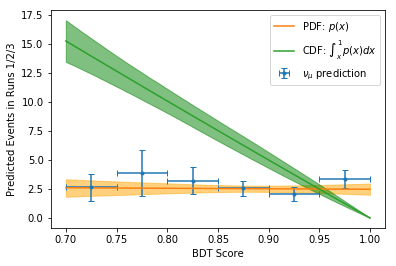

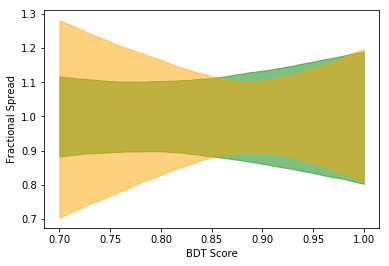

0.6 20.52336562646648 17.095150014879643 23.88848694169352 1.163965373734192 0.832960359719661
0.65 17.88251602995581 15.33719518631755 20.347788686054564 1.1378593846620388 0.857664277254136
0.7 15.263217545788665 13.42298044116622 17.047630711730903 1.1169093712114837 0.8794332126170742
0.75 12.665470173965064 11.305126762103889 14.001593394827038 1.1054933770724507 0.8925943219496522
0.8 10.08927391448499 9.029446046938444 11.150951430705629 1.1052283370656046 0.8949549911589803
0.85 7.534628767348438 6.640094461397075 8.43583843554084 1.1196090339709666 0.8812769237115096
0.9 5.001534732555431 4.306441427899022 5.713988654071355 1.1424470606748962 0.8610239972678816
0.95 2.489991810105948 2.0845347208125835 2.920586910335014 1.172930327915715 0.837165292011096


In [8]:
# Fit to overall bkg rate
from lmfit import minimize, Parameters, report_fit
import scipy

def line(x,m,b):
    return m*x + (b-m)

def cdf(x,m,b):
    return m/2 + (b-m) - m*x**2/2 - (b-m)*x

def getLineEnv(fitresult, xline, func, M=5000):
    p = func(xline,fitresult.params['m'],fitresult.params['b'])
    L = scipy.linalg.cholesky(fitresult.covar,lower=True)
    parvals = []
    parerrs = []
    for key in fitresult.params.valuesdict().keys():
        par = fitresult.params[key]
        parvals.append(par.value)
        parerrs.append(par.stderr)
    Zarr = np.transpose(np.vstack([np.random.normal(loc=0, scale=1, size=M)
                   for mean, sd in zip(parvals, parerrs)]))
    plist = []
    for Z in Zarr:
        pparvals = np.dot(L,Z) + parvals
        params = Parameters()
        for i,key in enumerate(fitresult.params.valuesdict().keys()):
            params.add(key,pparvals[i])
        pprime = func(xline,params['m'],params['b'])
        plist.append(pprime)
    parr = np.sort(np.transpose(np.array(plist)))
    lowindex = int(M * (0.5 - 0.68/2))
    highindex = int(M * (0.5 + 0.68/2))
    plow = parr[:,lowindex]
    phigh = parr[:,highindex]
    return p,plow,phigh

def lineobj(params,xarr,data,errs):
    res = []
    m = params['m'].value
    b = params['b'].value
    f = line(xarr,m,b)
    res = (data-f)/errs
    return res


k = tuple(('sigprob',0.7,nBDTs,bdtmode))
xarr = xbinsdict['bkg'][k]
xerr = (xarr[1]-xarr[0])/2
xline = np.linspace(xarr[0]-xerr,xarr[-1]+0.99*xerr,100)
data = prediction['bkg'][k]
errs = staterror['bkg'][k]
print(numbkgevents['bkg'][k])

fit_params = Parameters()
fit_params.add( 'm', value=(data[-1]-data[0])/(xarr[-1]-xarr[0]), min=-5, max=5)
fit_params.add( 'b', value=data[0], min=-2*max(data), max=2*max(data))

result = minimize(lineobj, fit_params, args=(xarr, data, errs),method='ampgo')
report_fit(result)
plt.errorbar(xarr,data,xerr=xerr,yerr=errs,label=r'$\nu_\mu$ prediction',fmt='.',capsize=3)
p,plow,phigh = getLineEnv(result,xline,line)
c,clow,chigh = getLineEnv(result,xline,cdf)
c /= 2*xerr
clow /= 2*xerr
chigh /= 2*xerr
plt.plot(xline,p,label='PDF: $p(x)$')
plt.plot(xline,c,label=r'CDF: $\int_x^1 p(x) dx$')
plt.fill_between(xline,plow,phigh,color='orange',alpha=0.5)
plt.fill_between(xline,clow,chigh,color='green',alpha=0.5)
plt.xlabel('BDT Score')
plt.legend()
plt.ylabel('Predicted Events in Runs 1/2/3')
#plt.ylim(0,2*max(data))
plt.show()

plt.fill_between(xline,clow/c,chigh/c,color='green',alpha=0.5)
plt.fill_between(xline,plow/p,phigh/p,color='orange',alpha=0.5)
plt.ylabel('Fractional Spread')
plt.xlabel('BDT Score')
plt.show()

fitNormError = {}
fitNormScale = {}
tc,tclow,tchigh = getLineEnv(result,np.array(bdtcutRange),cdf)
for cut,t,tl,th in zip(bdtcutRange,tc,tclow,tchigh):
    k = tuple(('Enu_1e1p',cut,nBDTs,bdtmode))
    t /= 2*xerr
    tl /= 2*xerr
    th /= 2*xerr
    print(cut,t,tl,th,th/t,tl/t)
    fitNormError[k] = np.average([th/t - 1,t/tl - 1])
    fitNormScale[k] = t


In [9]:
# Perform Background Fit
bkgmin = 9

def fitcdf(x, m, cen, s):
    
    xlow,xhigh = x[0],x[1]
    # basic landau + line
    cdf = scipy.stats.moyal.cdf(xhigh,loc=cen,scale=s) - scipy.stats.moyal.cdf(xlow,loc=cen,scale=s) + m/2*(xhigh**2 - xlow)**2
    #cdf = s*(np.exp(-(xlow-cen)/s) - np.exp(-(xhigh-cen)/s)) + m/2*(xhigh**2 - xlow)**2
    return  cdf

def fitfunc(x, m, cen, s, bwd):
    
    # basic landau + line
    bwp = x[1]-x[0] # assuming uniform binning
    xp = (x - cen)/s
    pdf = np.exp(-0.5*(xp + np.exp(-xp))) + m*x

    #return  pdf / (bwp/bwd*sum(pdf))
    return  pdf

def fitfunc_dataset(params, i, x, bwd, strategy='', verbose=False):
    # calc fitfunc from params for data set i
    # using simple, hardwired naming convention
    
    try:
        Np   = params['N%i'%i].value
        cen  = params['cen%i'%i].value
        s    = params['s%i'%i].value
        m    = params['m%i'%i].value
    except:
        try: Np   = params['N'].value
        except: Np = 1.0
        cen  = params['cen'].value
        s    = params['s'].value
        try: m    = params['m'].value
        except: m = 0
    
    if verbose: print(Np)
    
    if strategy=='CDF': return Np*fitcdf(x, m, cen, s)
    else: return Np*fitfunc(x, m, cen, s, bwd)
    

def objective(params, xarr, data, errs, strategy='',prior_val_dict={},prior_err_dict={}):
    # calculate total residual for fits to several data sets held
    # in a 2-D array, and modeled by Gaussian functions
    ndata = len(data)
    resid = np.empty(0)
    # make residual per data set
    for i in range(ndata):
        d = data[i]
        e = errs[i]
        x = xarr[i]
        bwd = x[1] - x[0]
        f = fitfunc_dataset(params, i, x, bwd, strategy=strategy)
        if strategy in ['ShapeFit','CDF']: 
            f *= sum(d)/sum(f)  

        res = np.array((d - f) / e)
        if strategy=='ShapeConstraint':
            priors = []
            priors.append((params['cen%i'%i].value - prior_val_dict['cen']) / prior_err_dict['cen'])
            priors.append((params['s%i'%i].value - prior_val_dict['s']) / prior_err_dict['s'])
            res = np.concatenate((res,np.array(priors)))
        resid = np.concatenate((resid,res))
    # now flatten this to a 1D array, as minimize() needs
    return resid.flatten()

def fit(mode,cutrange,strategy,refcut):

    # get all datasets and errors
    data = []
    errs = []
    xarr = []
    
    dataref = []
    errsref = []
    xarrref = []
    
    for cut in cutrange:
        k = tuple(('Enu_1e1p',cut,nBDTs,bdtmode))
        dat = prediction[mode][k]
        err = staterror[mode][k]
        nbkg = numbkgevents[mode][k]
        xbins = xbinsdict[mode][k]
        if strategy=='CDF':
            xbinslow = xbinedgesdict[mode][k][0:-1]
            xbinshigh = xbinedgesdict[mode][k][1:]
        filtr = np.logical_and(np.logical_not(np.isnan(err)),err!=0)
        filtr = np.logical_and(filtr,nbkg>=bkgmin)
        if mode=='lee':
            filtr = np.logical_and(filtr,xbins<=800)
        dat = dat[filtr]
        x = np.array(xbins)[filtr]
        if strategy=='CDF':
            x = (np.array(xbinslow)[filtr],np.array(xbinshigh)[filtr])
        err = err[filtr]
        data.append(dat)
        errs.append(err)
        xarr.append(x)
        if strategy=='ShapeConstraint' and cut==refcut:
            dataref.append(dat)
            errsref.append(err)
            xarrref.append(x)
        
    prior_val_dict = {}
    prior_err_dict = {}
    if strategy=='ShapeConstraint':
        first_params = Parameters()
        first_params.add( 'm', value=1e-5, min=0, max=1)
        first_params.add( 'cen', value=200, min=0,  max=500)
        first_params.add( 's', value=100, min=0.0, max=200.0)
        first_params.add( 'N', value=10, min=0.0, max=50)
        first_result = minimize(objective, first_params, args=(xarrref, dataref, errsref))
        report_fit(first_result)
        for key in ['cen','s']:
            par = first_result.params[key]
            prior_val_dict[key] = par.value
            prior_err_dict[key] = par.stderr
        
    
    # create parameters for datasets
    fit_params = Parameters()

    if strategy not in ['IndivFit','ShapeConstraint']:
        fit_params.add( 'm', value=1e-14, min=0, max=1e-10)
        fit_params.add( 'cen', value=200, min=0,  max=500)
        fit_params.add( 's', value=100, min=0.0, max=200.0)
    if strategy == 'ScaledFit':
        fit_params.add( 'N', value=10, min=0.0, max=50)
    elif strategy not in  ['ShapeFit','CDF']:
        for i in range(len(cutrange)):
            fit_params.add( 'N%i'%i, value=10, min=0.0, max=50)
            if strategy in ['IndivFit','ShapeConstraint']:
                fit_params.add( 'm%i'%i, value=1e-5, min=0, max=1)
                fit_params.add( 'cen%i'%i, value=200, min=0,  max=500)
                fit_params.add( 's%i'%i, value=100, min=0.0, max=200.0)

    # run the global fit to all the data sets
    result = minimize(objective, fit_params, args=(xarr, data, errs, strategy, prior_val_dict,prior_err_dict))
    report_fit(result)
    return result

strategy = 'CDF'
refcut = 0.7
if strategy in ['ScaledFit','ShapeFit','CDF']: 
    cutrange = [refcut]
elif strategy in ['IndivFit','FullFit','ShapeConstraint']:
    cutrange = bdtcutRange
else:
    print('Pick a valid strat!')
    exit(0)

#print('\n##### Fitting LEE #####\n')
#leeresult = fit('lee',cutrange,strategy,refcut)
print('\n##### Fitting BKG #####\n')
bkgresult = fit('bkg',cutrange,strategy,refcut)



##### Fitting BKG #####

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 39
    # data points      = 7
    # variables        = 3
    chi-square         = 0.37823534
    reduced chi-square = 0.09455884
    Akaike info crit   = -14.4270417
    Bayesian info crit = -14.5893113
[[Variables]]
    m:    1.7251e-13 +/- 2.2622e-14 (13.11%) (init = 1e-14)
    cen:  253.866792 +/- 11.2679562 (4.44%) (init = 200)
    s:    48.9546713 +/- 3.36620217 (6.88%) (init = 100)
[[Correlations]] (unreported correlations are < 0.100)
    C(cen, s) = -0.764
    C(m, s)   = -0.618
    C(m, cen) =  0.607


[Errno 17] File exists: 'BackgroundFitterOutput/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/'
[Errno 17] File exists: 'BackgroundFitterOutput/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/CDF/'
[Errno 17] File exists: 'BackgroundFitterOutput/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/CDF/avgscore/'
1.0
[55. 43. 17. 14. 13. 16. 11.]
16.599935300494497 0.033215553889081394
[7.4724913  4.84516599 1.97073855 0.87002767 0.9213508  1.47308517
 2.97050614]
[0.80451885 0.81242668 0.81172539 0.80409543 0.80876297 0.80524402
 0.80227041]
[1.1875843  1.19603871 1.19341007 1.20164784 1.19501846 1.19874358
 1.2005909 ]


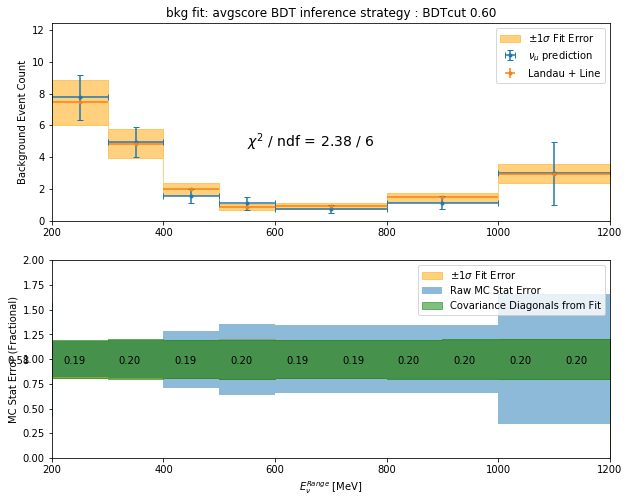

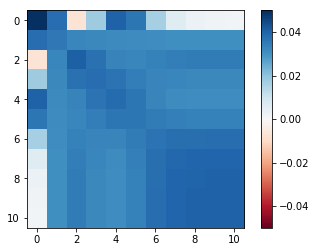

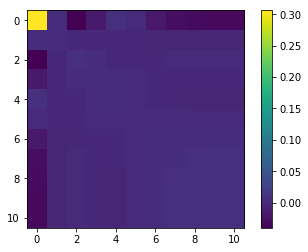

1.0
[48. 35. 15. 13. 13. 13. 11.]
14.463934157295952 0.023076157751235487
[6.51096647 4.22171296 1.71715324 0.75807663 0.80279573 1.28353554
 2.58827546]
[0.83634529 0.84218887 0.84085945 0.8308716  0.83518387 0.82863139
 0.82476729]
[1.15838033 1.16658896 1.16608302 1.17463159 1.16487356 1.1666678
 1.1683233 ]


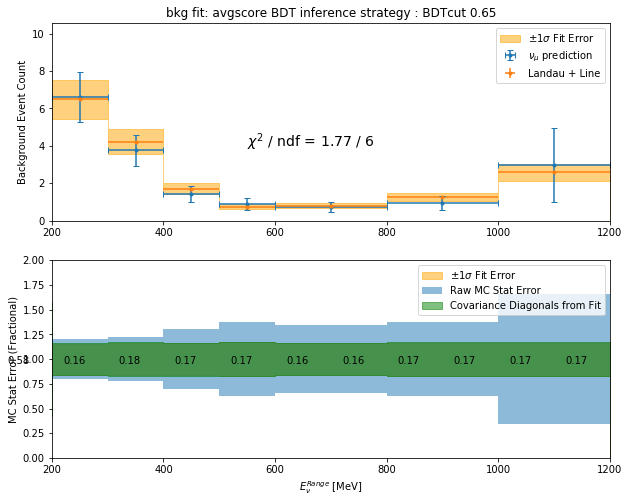

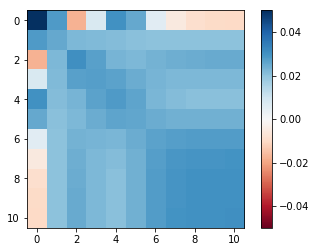

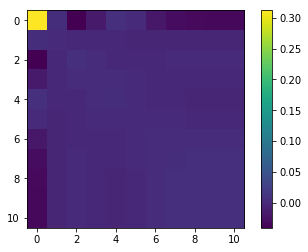

1.0
[38. 32. 15. 11. 13. 13. 10.]
12.345364222850755 0.016129683835804
[5.55728833 3.60334771 1.46563735 0.64703918 0.68520816 1.09553276
 2.20916405]
[0.85887363 0.86545737 0.86186102 0.84769848 0.85927043 0.85299546
 0.84959378]
[1.13430525 1.14166748 1.14124133 1.15099489 1.14360691 1.14907105
 1.15248071]


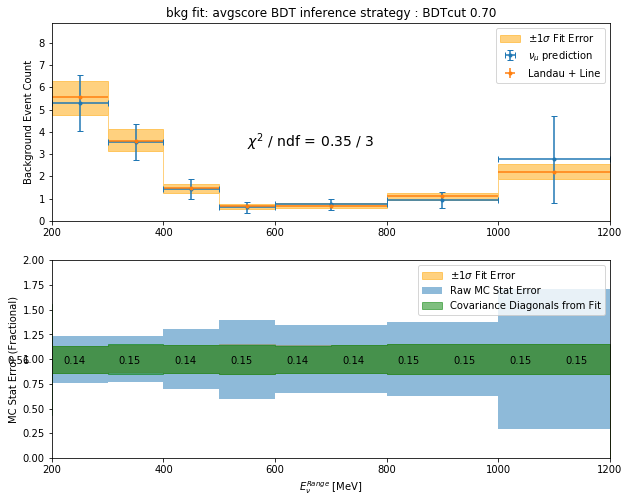

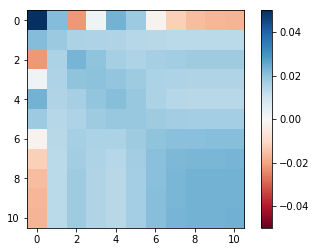

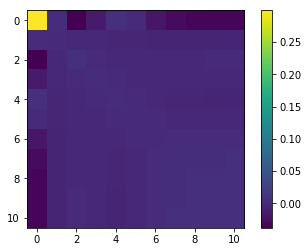

1.0
[33. 28. 14. 10. 12. 13.  9.]
10.244225497158919 0.012749024524646263
[4.61145688 2.99007027 1.21619089 0.53691533 0.56858808 0.90907683
 1.83317189]
[0.87026592 0.87786992 0.87446099 0.86235507 0.8722406  0.8654851
 0.86363553]
[1.12072583 1.13029908 1.12966105 1.14297028 1.13335808 1.13492737
 1.13818335]


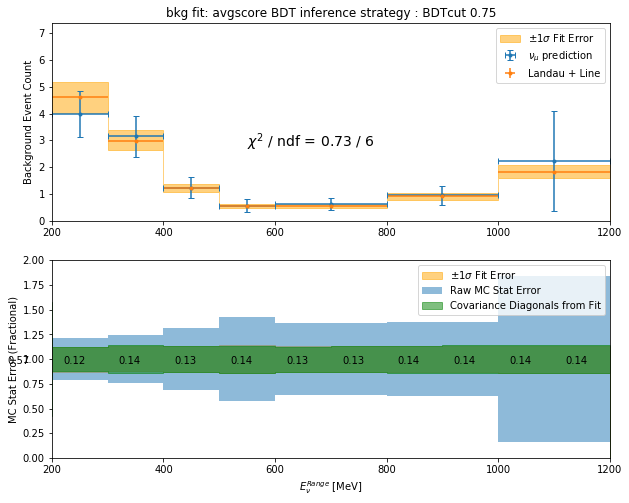

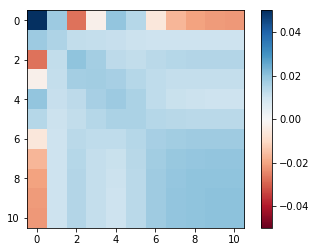

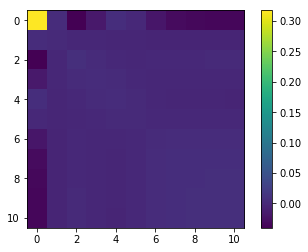

1.0
[30. 20. 12.  9. 11. 11.  7.]
8.160517980220432 0.012388019973828561
[3.67347213 2.38188062 0.96881386 0.42770507 0.45293548 0.72416776
 1.46029899]
[0.87260382 0.87945797 0.8765107  0.85867434 0.87164837 0.86781288
 0.86564821]
[1.12040116 1.12915281 1.12479777 1.13610769 1.12895035 1.13617953
 1.13884661]


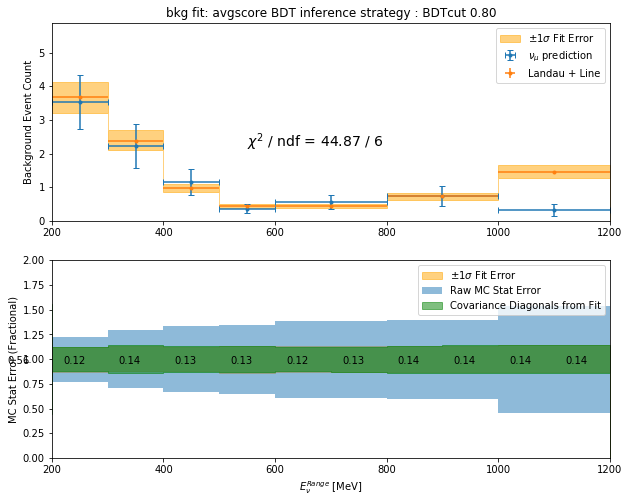

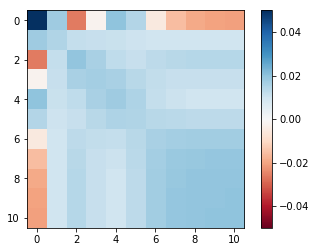

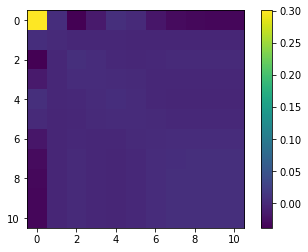

1.0
[21. 18.  9.  8.  8. 10.  6.]
6.09424167203529 0.01617044630197306
[2.74333406 1.77877877 0.72350625 0.31940841 0.33825038 0.54080554
 1.09054535]
[0.86133384 0.8646391  0.86362824 0.85247275 0.85895014 0.8492399
 0.84522767]
[1.13603546 1.14313273 1.14165095 1.15399067 1.1446472  1.14505239
 1.14674893]


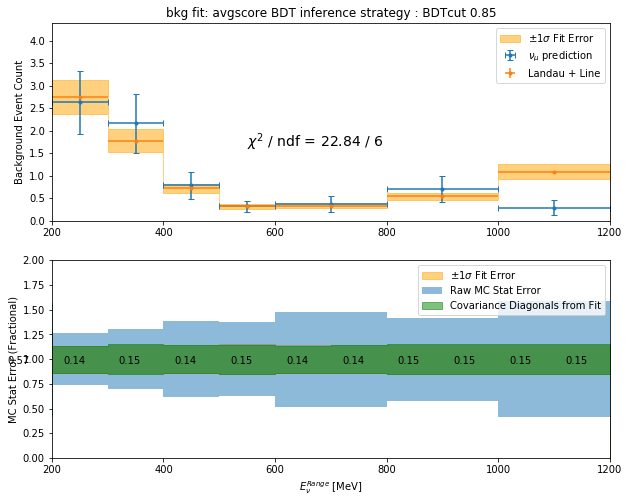

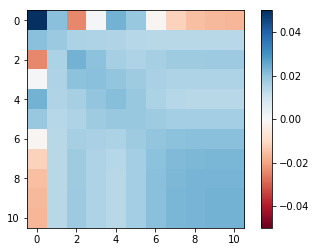

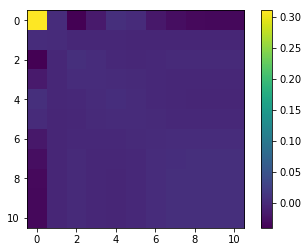

1.0
[16. 12.  4.  5.  4.  8.  5.]
4.045396572603511 0.02308194648616889
[1.82104268 1.18076472 0.48026808 0.21202534 0.22453276 0.35899018
 0.72391098]
[0.83637459 0.84116179 0.84067627 0.83087542 0.83786499 0.83082156
 0.82766657]
[1.15886578 1.16555648 1.16406345 1.17464359 1.1659953  1.16814528
 1.17047055]


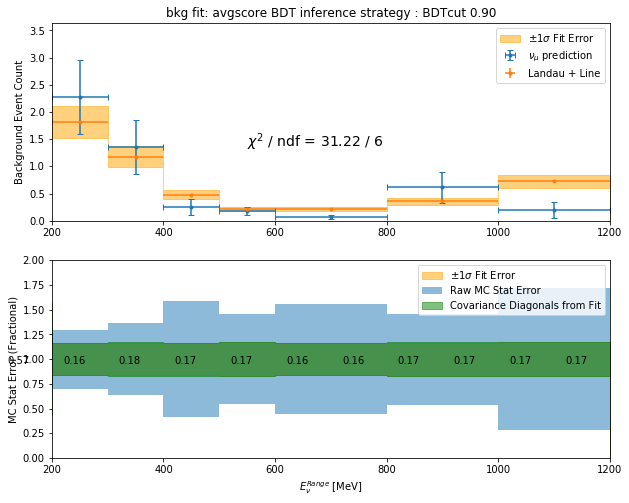

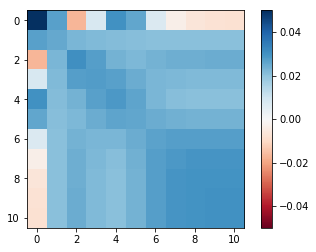

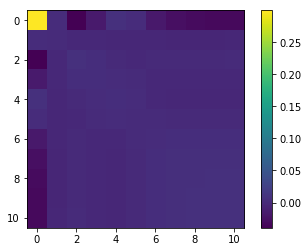

1.0
[7. 6. 3. 4. 2. 5. 4.]
2.0139826819250777 0.033752591055783904
[0.906598   0.58783846 0.23909932 0.10555587 0.11178264 0.17872166
 0.36039586]
[0.8063769  0.81056384 0.80967712 0.80092067 0.80922129 0.80515141
 0.80266364]
[1.18816277 1.19480934 1.19286915 1.20022375 1.19558833 1.2001166
 1.20236646]


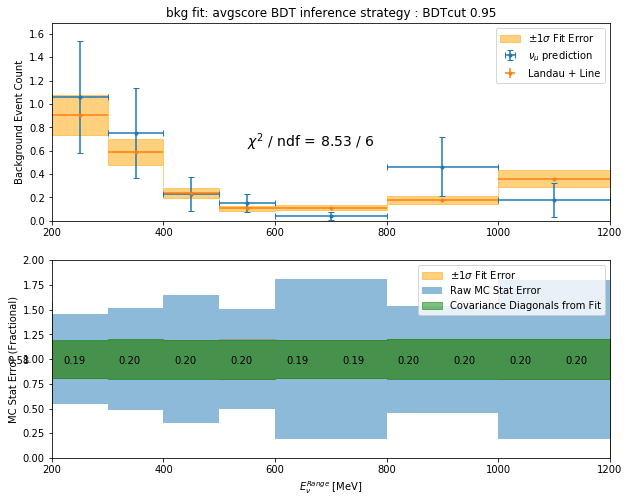

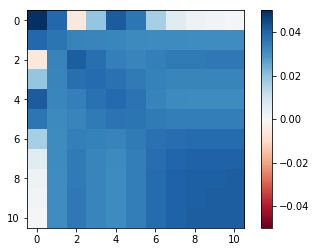

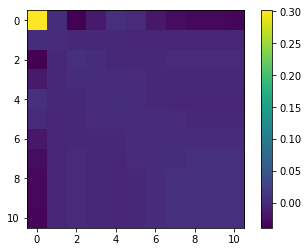

In [11]:
def getCholEnvelope(ip,p,fitresult,xfit,binwid,scale, M=1000):
    L = scipy.linalg.cholesky(fitresult.covar,lower=True)
    parvals = []
    parerrs = []
    for key in fitresult.params.valuesdict().keys():
        par = fitresult.params[key]
        parvals.append(par.value)
        parerrs.append(par.stderr)
    Zarr = np.transpose(np.vstack([np.random.normal(loc=0, scale=1, size=M)
                   for mean, sd in zip(parvals, parerrs)]))
    plist = []
    for Z in Zarr:
        pparvals = np.dot(L,Z) + parvals
        params = Parameters()
        for i,key in enumerate(fitresult.params.valuesdict().keys()):
            params.add(key,pparvals[i])
        pprime = scale*fitfunc_dataset(params, ip, xfit, binwid, strategy=strategy)
        if strategy in ['ShapeFit','CDF']: pprime*=sum(p)/sum(pprime)
        plist.append(pprime)
    parr = np.sort(np.transpose(np.array(plist)))
    lowindex = int(M * (0.5 - 0.68/2))
    highindex = int(M * (0.5 + 0.68/2))
    plow = parr[:,lowindex]
    phigh = parr[:,highindex]
    return plow,phigh

def getCholCovar(ip,p,fitresult,xfit,binwid,scale,M=5000):
    L = scipy.linalg.cholesky(fitresult.covar,lower=True)
    parvals = []
    parerrs = []
    for key in fitresult.params.valuesdict().keys():
        par = fitresult.params[key]
        parvals.append(par.value)
        parerrs.append(par.stderr)
    Zarr = np.transpose(np.vstack([np.random.normal(loc=0, scale=1, size=M)
                   for mean, sd in zip(parvals, parerrs)]))
    cov_matrix = np.zeros((len(p),len(p)))
    for Z in Zarr:
        pparvals = np.dot(L,Z) + parvals
        params = Parameters()
        for i,key in enumerate(fitresult.params.valuesdict().keys()):
            params.add(key,pparvals[i])
        pprime = scale*fitfunc_dataset(params, ip, xfit, binwid, strategy=strategy)
        if strategy in ['ShapeFit','CDF']: pprime*=sum(p)/sum(pprime)
        delta = pprime - p
        cov_matrix += np.outer(delta,delta) / M
    return cov_matrix
        

def printPred(xb,p,cov,savedir,stag):
    fout = open(savedir+stag+'_prediction.txt','w')
    for _ in xb: print(_,end=' ',file=fout)
    print('',file=fout)
    for _ in p: print(_,end=' ',file=fout)
    fout.close()
    fout = open(savedir+stag+'_cov.txt','w')
    N = len(cov)
    for i in range(N):
        for j in range(N):
            print(cov[i,j],end=' ',file=fout)
        print('',file=fout)
    fout.close()
    
if protonMPIDcut:   
    savedir = 'BackgroundFitterOutput/'+tag+'_protonMPIDcut/'
else:   
    savedir = 'BackgroundFitterOutput/'+tag+'/'
try: os.mkdir(savedir)
except OSError as error: print(error)
savedir = savedir+strategy+'/'
try: os.mkdir(savedir)
except OSError as error: print(error)
savedir = savedir+bdtmode+'/'
try: os.mkdir(savedir)
except OSError as error: print(error)
    
bkgmin = 2
    
xfit = np.arange(50,1200,1)
xnom = np.linspace(150,1150,11)
for i,cut in enumerate(bdtcutRange):
    pdict = {}
    plowdict = {}
    phighdict = {}
    for mode,result in zip(['bkg'],[bkgresult]):
        fig, ax = plt.subplots(2,figsize=(10,8))
        for bmode in [bdtmode]:
            if bmode!='fracweight' and strategy=='IndivFit' and cut>0.9: continue
            k = tuple(('Enu_1e1p',cut,nBDTs,bmode))
            xbins = np.array(xbinsdict[mode][k])
            xbin_edges = np.array(xbinedgesdict[mode][k])
            if strategy=='CDF':
                xbinslow = xbin_edges[:-1]
                xbinshigh = xbin_edges[1:]
                xbinstuple = (np.array(xbinslow),np.array(xbinshigh))
                xfit = xbins
                xnomlow = xnom-50
                xnomhigh = xnom+50
                xnomtuple = (np.array(xnomlow),np.array(xnomhigh))
            binwidts = xbin_edges[1:]-xbin_edges[:-1]
            binwid = xbin_edges[1]-xbin_edges[0]
            plotmult = binwid/binwidts
            kRef = tuple(('Enu_1e1p',refcut,nBDTs,bmode))
            fracerrorref = np.sum(np.array(weightsdict[mode][kRef])**2) / np.sum(np.array(weightsdict[mode][kRef]))**2
            if strategy=='CDF':
                p = fitfunc_dataset(result.params, i, xbinstuple, xbins[1] - xbins[0], strategy=strategy, verbose=True)
                pscale = fitfunc_dataset(result.params, i, xbinstuple, xbins[1] - xbins[0], strategy=strategy)
                pcov = fitfunc_dataset(result.params, i, xnomtuple, xnom[1] - xnom[0], strategy=strategy)
            else:
                p = fitfunc_dataset(result.params, i, xfit, xbins[1] - xbins[0], strategy=strategy, verbose=True)
                pscale = fitfunc_dataset(result.params, i, xbins, xbins[1] - xbins[0], strategy=strategy)
                pcov = fitfunc_dataset(result.params, i, xnom, xnom[1] - xnom[0], strategy=strategy)
            ax[0].errorbar(xbins,prediction[mode][k],xerr=binwidts/2,yerr=staterror[mode][k],label=r'$\nu_\mu$ prediction',fmt='.',capsize=3)
            print(numbkgevents[mode][k])
            xbinsunfit = np.array(xbins)[numbkgevents[mode][k]<bkgmin]
            binwidtsunfit = binwidts[numbkgevents[mode][k]<bkgmin]
            predunfit = prediction[mode][k][numbkgevents[mode][k]<bkgmin]
            staterrunfit = staterror[mode][k][numbkgevents[mode][k]<bkgmin]
            if strategy=='ScaledFit':
                scale = sum(prediction[mode][k]) / sum(prediction[mode][kRef])
                erroradd = np.sum(np.array(weightsdict[mode][k])**2) / np.sum(np.array(weightsdict[mode][k]))**2 - fracerrorref
            elif strategy in ['ShapeFit','CDF']:
                scale = (sum(prediction[mode][k])) / sum(pscale)
                #print(np.sum(np.array(weightsdict[mode][k])),np.sqrt(np.sum(np.array(weightsdict[mode][k])**2)))
                #print(prediction[mode][k])
                #print(scale*pscale)
                erroradd = np.sum(np.array(weightsdict[mode][k])**2) / np.sum(np.array(weightsdict[mode][k]))**2
                erroradd = fitNormError[k]**2
                scale = fitNormScale[k]/sum(pscale/plotmultdict[k])
            else:
                scale = 1.0
                erroradd = 0.0
            print(scale,erroradd)
            p*=scale
            pcov*=scale
            pscale*=scale
            ax[0].errorbar(xbinsunfit,predunfit,xerr=binwidtsunfit/2,yerr=staterrunfit,fmt='.',capsize=3,color='r')
            pdict[mode] = p
            if strategy=='CDF':
                ax[0].errorbar(xfit,p,xerr=binwidts/2,yerr=0,label='Landau + Line',fmt='.')
            else:
                ax[0].plot(xfit,p,label='Landau + Line')
            ndf = 0
            csq = 0
            csq0 = 0
            for x,d,f,e,n in zip(xbins,prediction[mode][k],pscale,staterror[mode][k],numbkgevents[mode][k]):
                if e>0 and n>=bkgmin:
                    if mode == 'lee':
                        if x > 800: continue
                        csq += ((d - f)/sqrt(d))**2
                        csq0 += (d/sqrt(d))**2
                    else:
                        csq += ((d - f)/e)**2
                        csq0 += (d/e)**2
                    ndf += 1
            if cut in cutrange: 
                if strategy in ['ShapeFit','CDF']:
                    ndf -= len(result.params)+1
                if strategy=='ScaledFit':
                    ndf -= len(result.params)
                elif strategy=='ShapeConstraint':
                    ndf -= 4
                elif strategy=='FullFit':
                    ndf -= len(result.params) - len(bdtcutRange) + 1
            elif strategy=='CDF': ndf -= 1

            if strategy=='CDF':
                plow,phigh = getCholEnvelope(i,p,result, xbinstuple, xbins[1] - xbins[0], scale)
                cov = getCholCovar(i,pcov,result, xnomtuple, xnom[1] - xnom[0], scale)
            else:
                plow,phigh = getCholEnvelope(i,p,result, xfit, xbins[1] - xbins[0], scale)
                cov = getCholCovar(i,pcov,result, xnom, xnom[1] - xnom[0], scale)
            plow = p - p*np.sqrt(((p-plow)/p)**2 + erroradd)
            phigh = p*np.sqrt(((phigh-p)/p)**2 + erroradd) + p
            plowdict[mode] = plow
            phighdict[mode] = phigh
            
            fraccov =  cov / np.outer(pcov,pcov)
            fraccov += erroradd
            fracerrs = np.sqrt(np.diagonal(fraccov))
            printPred(xbin_edges,pcov,fraccov,savedir,mode+'_%2.2f'%cut)

            if strategy=='CDF':
                ax[0].fill_between(xbin_edges,np.append(plow,0),np.append(phigh,0),color='orange',step='post',alpha=0.5,label=r'$\pm1\sigma$ Fit Error')
                print(p)
                print(plow/p)
                print(phigh/p)
                ax[1].fill_between(xbin_edges,np.append(plow/p,0),np.append(phigh/p,0),alpha=0.5,step='post',label=r'$\pm1\sigma$ Fit Error',color='orange')
            else:
                ax[0].fill_between(xfit,plow,phigh,color='orange',alpha=0.5,label=r'$\pm1\sigma$ Fit Error')
                ax[1].fill_between(xfit-(xfit[1]-xfit[0])/2,plow/p,phigh/p,alpha=0.5,step='post',label=r'$\pm1\sigma$ Fit Error',color='orange')
            
            ax[1].fill_between(xbin_edges,1-np.append(staterror[mode][k]/prediction[mode][k],0),1+np.append(staterror[mode][k]/prediction[mode][k],0),alpha=0.5,step='post',label='Raw MC Stat Error')
            ax[1].fill_between(list(xnom-50)+[1200],np.append(1-fracerrs,0),np.append(1+fracerrs,0),alpha=0.5,step='post',label='Covariance Diagonals from Fit',color='green')
            
            for ia in [0,1]: ax[ia].set_xlim(xbins[0]-binwid/2,xbins[-1]+binwid/2)
            ax[0].legend(ncol=1)
            ax[1].legend()
            ax[0].set_title('%s fit: %s BDT inference strategy : BDTcut %2.2f'%(mode,bmode,cut))
            ax[0].set_ylabel('Background Event Count')
            ax[1].set_ylabel('MC Stat Error (Fractional)')
            ax[1].set_xlabel(r'$E_\nu^{Range}$ [MeV]')
            ymax = max(max(prediction[mode][k]),max(p))
            ax[0].set_ylim(0,1.6*ymax)
            ax[0].text(xbins[len(xbins)/2],0.6*ymax,r'$\chi^2$ / ndf = %2.2f / %i'%(csq,ndf),fontsize=14)
            #ax[0].text(xbins[-5],0.4*ymax,r'$\chi^2_{NULL}$ / ndf = %2.2f / %i'%(csq0,ndf),fontsize=14)  

            ax[1].set_ylim(0,2)
            ax[0].set_xlim(xbin_edges[0],xbin_edges[-1])
            ax[1].set_xlim(xbin_edges[0],xbin_edges[-1])
            
            for x,f in zip(xnom-30,fracerrs): ax[1].text(x,0.95,'%2.2f'%f)
            
            plt.show()
            
            plt.imshow(fraccov,vmin=-0.05,vmax=0.05,cmap='RdBu')
            plt.colorbar()
            plt.show()
            plt.imshow(fraccov-erroradd)
            plt.colorbar()
            plt.show()
    
#     for mode,color in zip(['lee','bkg'],['orange','blue']):
#         plt.plot(xfit,pdict[mode],label=mode,color=color)
#         plt.fill_between(xfit,plowdict[mode],phighdict[mode],alpha=0.5,color=color)
#     plt.xlabel(r'$E_\nu^{Range}$ [MeV]')
#     plt.ylabel('Counts')
#     plt.legend()
#     plt.show()
        
        